In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Earthquakes_database.csv'
earthquakes_df = pd.read_csv(file_path)

In [6]:
earthquakes_df['Date'] = earthquakes_df['Date'].astype(str)

earthquakes_df[['Month', 'Day', 'Year']] = earthquakes_df['Date'].str.split('/', expand=True)

earthquakes_df['Date'] = pd.to_datetime(earthquakes_df['Date'], format='%m/%d/%Y', errors='coerce')





ValueError: Columns must be same length as key

In [7]:
threshold = len(earthquakes_df) * 0.5
cleaned_df = earthquakes_df.dropna(thresh=threshold, axis=1)

print(cleaned_df.head())
print(cleaned_df.info())


         Date      Time  Latitude  Longitude        Type  Depth  Magnitude  \
0  1965-01-02  13:44:18    19.246    145.616  Earthquake  131.6        6.0   
1  1965-01-04  11:29:49     1.863    127.352  Earthquake   80.0        5.8   
2  1965-01-05  18:05:58   -20.579   -173.972  Earthquake   20.0        6.2   
3  1965-01-08  18:49:43   -59.076    -23.557  Earthquake   15.0        5.8   
4  1965-01-09  13:32:50    11.938    126.427  Earthquake   15.0        5.8   

  Magnitude Type  Root Mean Square            ID  Source Location Source  \
0             MW               NaN  ISCGEM860706  ISCGEM          ISCGEM   
1             MW               NaN  ISCGEM860737  ISCGEM          ISCGEM   
2             MW               NaN  ISCGEM860762  ISCGEM          ISCGEM   
3             MW               NaN  ISCGEM860856  ISCGEM          ISCGEM   
4             MW               NaN  ISCGEM860890  ISCGEM          ISCGEM   

  Magnitude Source     Status Month Day  Year  
0           ISCGEM  Automa

In [8]:
melted_df = pd.melt(earthquakes_df, id_vars=['Date'], value_vars=['Magnitude'],
                    var_name='Measurement', value_name='Value')

print("Melted DataFrame:")
print(melted_df.head())


Melted DataFrame:
         Date Measurement  Value
0  1965-01-02   Magnitude    6.0
1  1965-01-04   Magnitude    5.8
2  1965-01-05   Magnitude    6.2
3  1965-01-08   Magnitude    5.8
4  1965-01-09   Magnitude    5.8


In [9]:
earthquakes_df['Date'] = pd.to_datetime(earthquakes_df['Date'], format='%m/%d/%Y', errors='coerce')
earthquakes_df['Year'] = earthquakes_df['Date'].dt.year

pivot_table_df = earthquakes_df.pivot_table(values='Magnitude', index='Year', aggfunc='mean')

print("\nPivot Table:")
print(pivot_table_df.head())



Pivot Table:
Empty DataFrame
Columns: []
Index: []


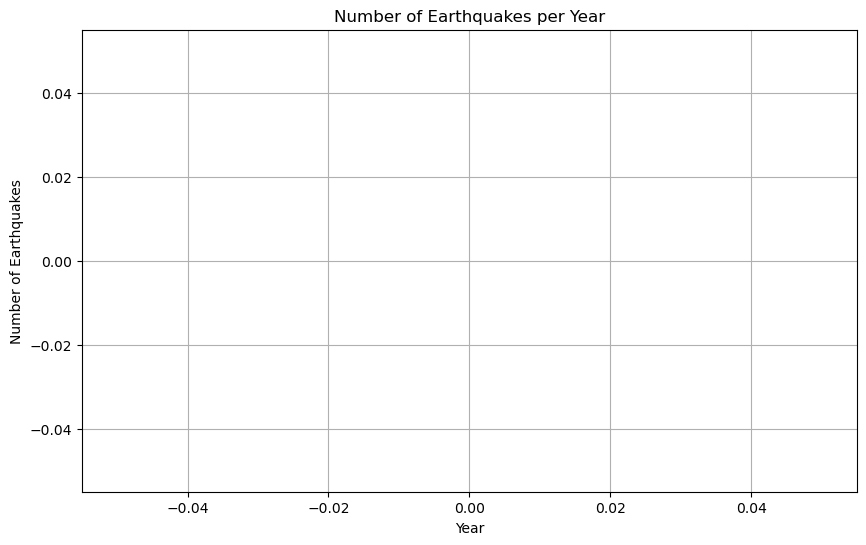

In [10]:
plt.figure(figsize=(10, 6))
earthquakes_per_year = earthquakes_df['Year'].value_counts().sort_index()
plt.plot(earthquakes_per_year.index, earthquakes_per_year.values, marker='o')
plt.title('Number of Earthquakes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.show()


IndexError: index 0 is out of bounds for axis 0 with size 0

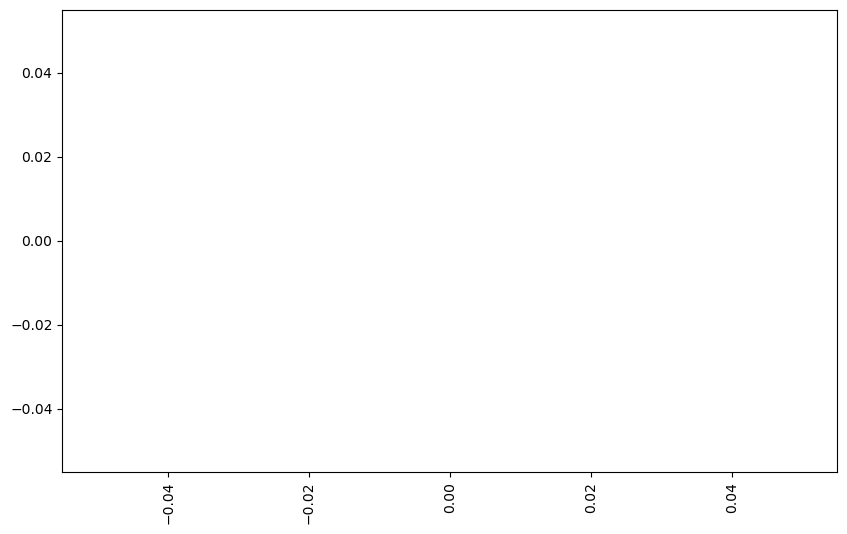

In [11]:
plt.figure(figsize=(10, 6))
avg_magnitude_per_year = earthquakes_df.groupby('Year')['Magnitude'].mean()
avg_magnitude_per_year.plot(kind='bar')
plt.title('Average Magnitude of Earthquakes per Year')
plt.xlabel('Year')
plt.ylabel('Average Magnitude')
plt.grid(True)
plt.show()


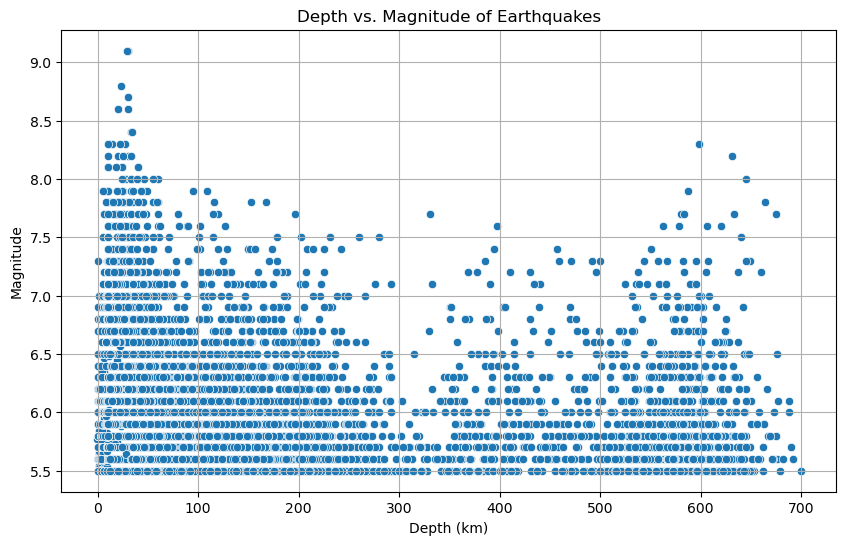

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=earthquakes_df, x='Depth', y='Magnitude')
plt.title('Depth vs. Magnitude of Earthquakes')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


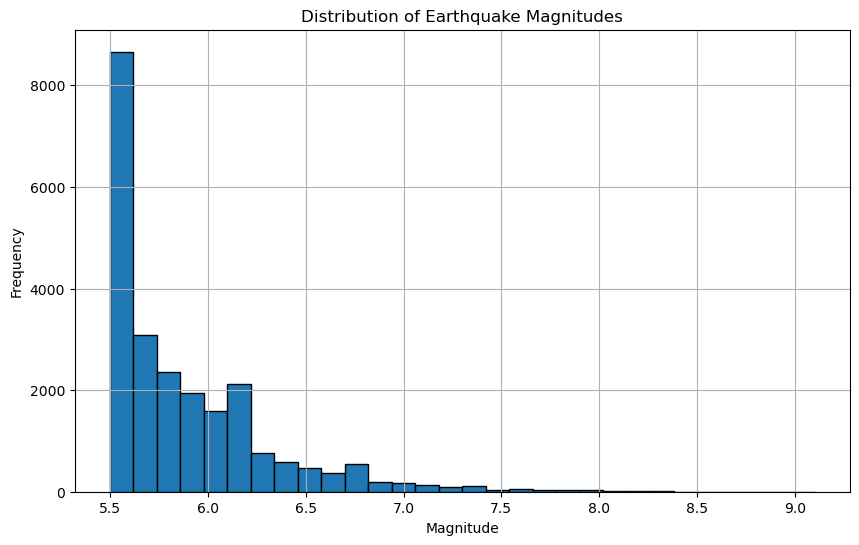

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(earthquakes_df['Magnitude'], bins=30, edgecolor='black')
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [14]:
earthquakes_df.set_index('Date', inplace=True)

avg_magnitude_per_year = earthquakes_df['Magnitude'].resample('A').mean()

print("\nAverage magnitude of earthquakes per year:")
print(avg_magnitude_per_year.head())


AttributeError: 'NaTType' object has no attribute 'normalize'